In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 시간 관리를 위한 라이브러리
import datetime

# 데이터 수집
from pandas_datareader import data
import requests
from bs4 import BeautifulSoup
import re
import time
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select

# 화면 청소
from IPython.display import clear_output

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 시계열 분석
from pmdarima.arima import auto_arima
from fbprophet import Prophet

# 형태소 분석도구
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2
from soynlp.noun import LRNounExtractor
from soynlp.noun import NewsNounExtractor

# 워드 클라우드
from collections import Counter
import pytagcloud
from IPython.display import Image

# 상관관계
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pygame 2.1.2 (SDL 2.0.18, Python 3.8.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


### MovieLens 데이터 살펴보기

In [2]:
# 데이터를 읽어온다.
rating_data = pd.read_csv('data/ratings.dat', delimiter='::', header=None)
rating_data.columns = ['user_id', 'movie_id', 'rating', 'time']
rating_data

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [6]:
movie_data = pd.read_csv('data/movies.dat', delimiter='::', header=None, 
                         encoding='ISO-8859-1')

movie_data.columns = ['movie_id', 'title', 'genre']
movie_data

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [5]:
user_data = pd.read_csv('data/users.dat', delimiter='::', header=None)
user_data.columns = ['user_id', 'gender', 'age', 'occupation', 'zipcode']
user_data

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [7]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
 3   time      1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [8]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [9]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [10]:
rating_data.isna().sum()

user_id     0
movie_id    0
rating      0
time        0
dtype: int64

In [11]:
movie_data.isna().sum()

movie_id    0
title       0
genre       0
dtype: int64

In [12]:
user_data.isna().sum()

user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64

### 데이터 분석

#### 년대별 (1990, 1980년대..)별 영화 개수를 파악한다.

In [15]:
# 전체 영화의 개수
print(f'전체 영화의 개수 : {len(movie_data)}')

전체 영화의 개수 : 3883


In [19]:
# 중복된 데이터가 존재할 가능성이 있으므로 확인한다.
print(len(movie_data['movie_id'].unique()))

3883


In [22]:
# title 컬럼에서 영화 상영 년도를 가져온다.
a1 = movie_data['title'].str[-5:-1]

# year라는 컬럼으로 추가한다.
movie_data['year'] = a1
movie_data

,movie_id,title,genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [26]:
# year 컬럼을 통해 년대를 구한다.
a1 = movie_data['year'].str[:-1] + '0'
movie_data['year_term'] = a1
movie_data

,movie_id,title,genre,year,year_term
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,Father of the Bride Part II (1995),Comedy,1995,1990
...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000,2000
3879,3949,Requiem for a Dream (2000),Drama,2000,2000
3880,3950,Tigerland (2000),Drama,2000,2000
3881,3951,Two Family House (2000),Drama,2000,2000


In [29]:
# 년대별 영화의 수를 가져온다.
movie_year_term = movie_data['year_term'].value_counts()
movie_year_term.sort_index(inplace=True)
movie_year_term

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64

In [32]:
movie_year_term = movie_data.groupby('year_term')['movie_id'].count()
movie_year_term

year_term
1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: movie_id, dtype: int64

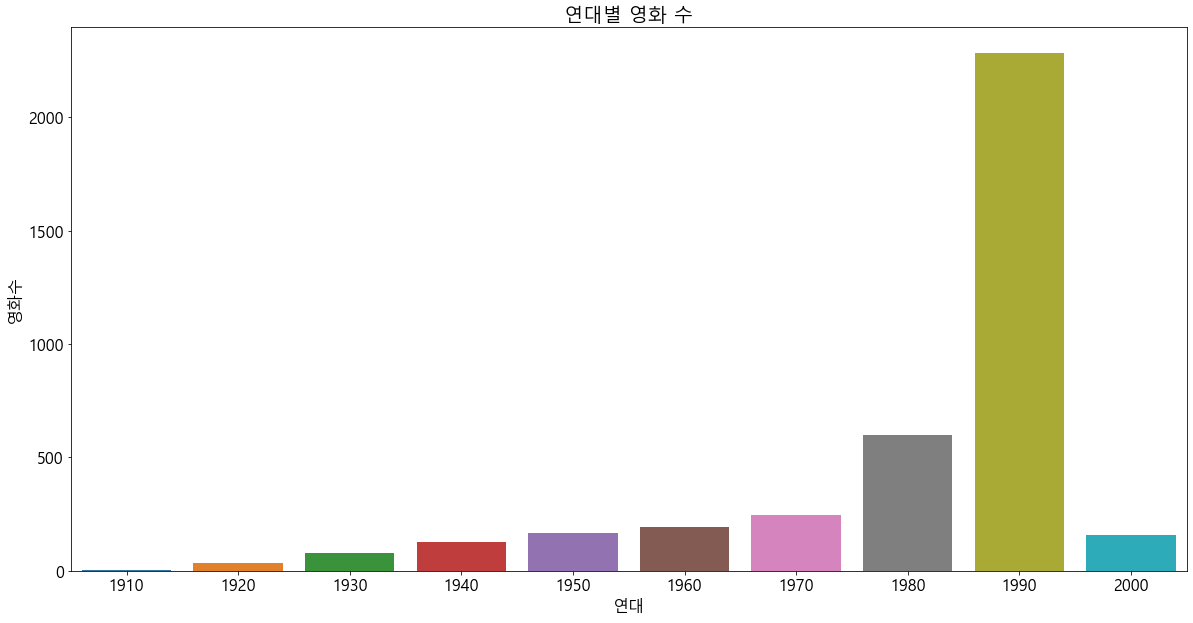

In [36]:
x = movie_year_term.index
y = movie_year_term.values

sns.barplot(x, y)
plt.title('연대별 영화 수')
plt.xlabel('연대')
plt.ylabel('영화수')
plt.show()

### 장르별 속성 탐색

In [37]:
movie_data['genre'].value_counts()

Drama                                  843
Comedy                                 521
Horror                                 178
Comedy|Drama                           162
Comedy|Romance                         142
                                      ... 
Action|Comedy|Crime|Horror|Thriller      1
Action|Drama|Thriller|War                1
Action|Adventure|Children's              1
Action|Adventure|Children's|Fantasy      1
Adventure|Crime|Sci-Fi|Thriller          1
Name: genre, Length: 301, dtype: int64

In [41]:
# 장르들을 담을 리스트
genre_list = []

# 영화의 수 만큼 반복한다.
for row in movie_data['genre'] :
    # print(row)
    
    # | 를 기준으로 잘라낸다.
    a1 = row.split('|')
    # print(a1)
    
    # 리스트에 누적한다.
    genre_list.extend(a1)
    
# genre_list

In [42]:
# Series로 생성한다.
s1 = pd.Series(genre_list)
# 장르별 영화수를 확인한다.
unique_genre = s1.value_counts()
unique_genre

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

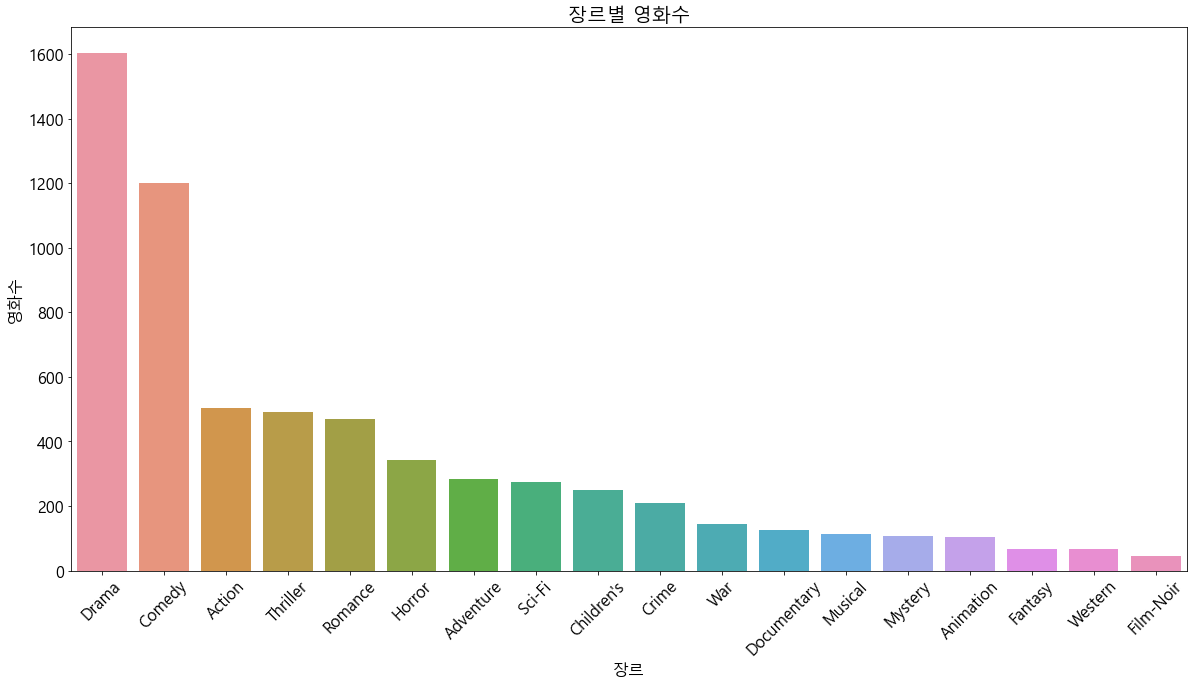

In [45]:
x = unique_genre.index
y = unique_genre.values

sns.barplot(x, y)
plt.title('장르별 영화수')
plt.xlabel('장르')
plt.ylabel('영화수')
plt.xticks(rotation=45)
plt.show()

- 사용자의 성별 수를 그래프로 시각화한다.
- 연령대별(10대, 20대...) 사용자수를 그래프로 시각화한다.